In [1]:
# 연습문제 9-2
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
P = [[178, 71, 72, 29],
     [166, 65, 60, 30]]
dist.pairwise(P)

array([[ 0.        , 18.02775638],
       [18.02775638,  0.        ]])

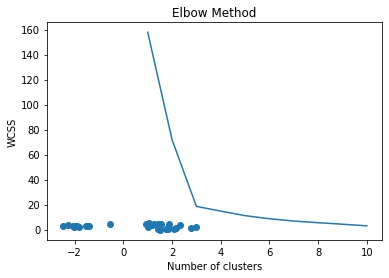

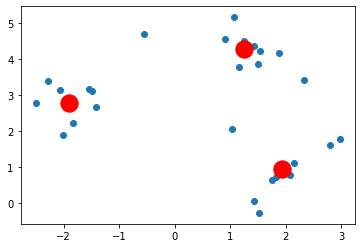

{0: 2, 1: 0, 2: 0, 3: 0, 4: 1, 5: 2, 6: 1, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 2, 15: 2, 16: 1, 17: 2, 18: 0, 19: 2, 20: 1, 21: 1, 22: 2, 23: 2, 24: 2, 25: 1, 26: 1, 27: 1, 28: 0, 29: 2}


In [16]:
# 연습문제 9-3-1)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
# 데이터 불러오기
X = pd.read_csv('C:/gskim/P4DS/data/ex93.csv')
X.columns=["v1", "v2","v3", "v4", "v5","v6"]
X.head()  # 상단의 5개의 데이터 확인하기
# 연습문제 9-3-1)
X, y = make_blobs(n_samples=30, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
Kx =kmeans.cluster_centers_[:, 0]
Kx_mapping = {case:cluster for case,
             cluster in enumerate(kmeans.labels_)}
print(Kx_mapping)

{0: 1, 1: 2, 2: 1, 3: 0, 4: 2, 5: 1, 6: 1, 7: 1, 8: 2, 9: 0, 10: 1, 11: 2, 12: 1, 13: 0, 14: 2, 15: 1, 16: 1, 17: 1, 18: 2, 19: 0, 20: 2, 21: 1, 22: 2, 23: 0, 24: 1, 25: 0, 26: 1, 27: 0, 28: 0, 29: 2}


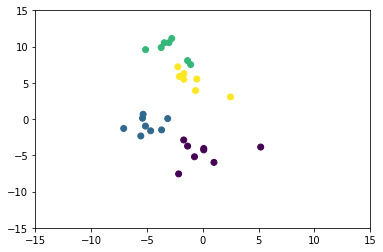

In [32]:
# 연습문제 9-3-2)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import scipy.cluster.hierarchy as sch
%matplotlib inline
# loading data
X = pd.read_csv('C:/gskim/P4DS/data/ex93.csv')
X.columns=["v1", "v2","v3", "v4", "v5","v6"]
X.head()  # confirm data
# create blobs
data = make_blobs(n_samples=30, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters=3, 
                                     affinity='euclidean',
                                     linkage='ward')
Hclustering.fit(X)
# cluster analysis
H_mapping = {case: cluster for case,
            cluster in enumerate(Hclustering.labels_)}
print(H_mapping)

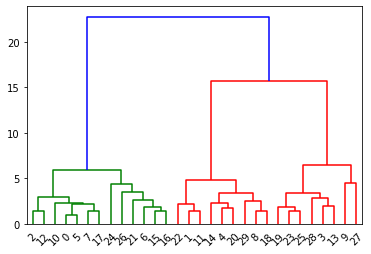

In [33]:
# 연습문제 9-3-2)
# draw dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))


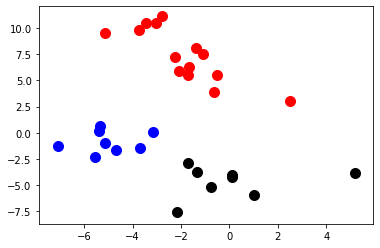

In [34]:
# 연습문제 9-3-2)
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')